---
# Predictive Small Business Loan Default Analysis Model
---

**Author**: Dhevina Tailor

**Contact**: [dhevinatailor@gmail.com](mailto:dhevinatailor@gmail.com)

**Date**: October 20, 2023

## Table of Contents
---
1. [Introduction: Exploratory Data Analysis](#introduction)
2. [Loading and Setup](#loadingandsetup)
2. [Assessment](#assessment)
3. [Exploratory Data Analysis (EDA)](#eda)
4. [Findings Summary](#findings)
5. [Saving the Data](#saving)

## Introduction: Exploratory Data Analysis (EDA) <a class="anchor" id="introduction"></a>

With our data now cleaned and prepared, we can delve into the analysis phase. A preliminary Exploratory Data Analysis (EDA) is conducted to begin to describe relationships between variables, and start formulating hypotheses for further analysis.

**Understanding Our Clients:**
We aim to uncover the characteristics of the clients seeking loans. To do this, we will categorize our data into two main groups: categorical and numeric. This structured approach will help us gain valuable insights into the clients and their loan-seeking behavior.

## Loading and Setup <a class="anchor" id="loadingandsetup"></a>

In [1]:
# importing required libraries
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
#from scipy import stats
#from scipy.stats import norm

### Get Data

In [2]:
# import data to new dataframe
df = pd.read_csv("Cleaned_Loan_Data.csv")

## Assessment <a class="anchor" id="assessment"></a>

In [3]:
df.shape

(836136, 13)

In [4]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns in our dataset')

We have 836136 rows and 13 columns in our dataset


Next, we inspect the first rows of data to get a feel for the structure.

In [5]:
df.head()

,Name,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,4,2.0,1,0,N,Paid
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,2,2.0,1,0,N,Paid
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,7,1.0,1,0,N,Paid
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,2,1.0,1,0,N,Paid
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,14,1.0,1,0,N,Paid


Next, we inspect the different datatypes of the dataset.

In [6]:
# Display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836136 entries, 0 to 836135
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           836136 non-null  object 
 1   City           836136 non-null  object 
 2   State          836136 non-null  object 
 3   Zip            836136 non-null  int64  
 4   Bank           836136 non-null  object 
 5   BankState      836136 non-null  object 
 6   NAICS          836136 non-null  int64  
 7   NoEmp          836136 non-null  int64  
 8   NewExist       836136 non-null  float64
 9   FranchiseCode  836136 non-null  int64  
 10  UrbanRural     836136 non-null  int64  
 11  RevLineCr      836136 non-null  object 
 12  MIS_Status     836136 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 82.9+ MB


The provided information is a summary of a pandas DataFrame with 836,136 entries (rows) and 13 columns. The DataFrame has undergone some data preprocessing or filtering, and the output represents the current state of the DataFrame after these operations.

1. **Filtering and Data Preprocessing**: The initial DataFrame had 899,164 entries, but some rows have been removed during data cleaning steps. As a result, the DataFrame now contains 836,136 entries.

2. **Columns and Data Types**: The DataFrame contains 13 columns in total, with 6 columns having a numerical data type (float64, int64) and 7 columns having an object data type. The numerical columns represent continuous or discrete numeric features, while the object columns may contain categorical or string-based data.

In [7]:
# Get a statistical summary of the dataset
df.describe()

,Zip,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural
count,836136.000000,836136.000000,836136.000000,836136.000000,836136.000000,836136.000000
mean,53917.176258,396790.804393,11.357026,1.271241,674.622394,0.757046
std,31252.879772,261024.413841,73.100707,0.444600,5991.353525,0.647849
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,27572.000000,235310.000000,2.000000,1.000000,1.000000,0.000000
50%,55427.000000,445310.000000,4.000000,1.000000,1.000000,1.000000
75%,83836.000000,561730.000000,10.000000,2.000000,1.000000,1.000000
max,99999.000000,928120.000000,9999.000000,2.000000,92006.000000,2.000000


#### Applicability of `df.describe()`

The `df.describe()` method, which provides summary statistics, applies to the following column:

- **NoEmp**: This column contains numerical data, making it suitable for generating statistics like mean, standard deviation, and quartiles.

For the following columns, `df.describe()` is not applicable:

- **Zip**: Zip codes are categorical and not suitable for summary statistics.
- **NAICS**: NAICS codes represent industry categories and are not suitable for numerical statistics.
- **NewExist**: This column contains categorical values (1 and 2) and doesn't provide meaningful numerical statistics.
- **FranchiseCode**: Franchise codes are categorical and not suitable for numerical statistics.
- **UrbanRural**: This column contains categorical values (0, 1, and 2) and doesn't provide meaningful numerical statistics.


## Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>

### Univariate Analysis - Categorical

Let's look at the variable of interest, 'MIS_Status':

In [8]:
df.head()

,Name,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,4,2.0,1,0,N,Paid
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,2,2.0,1,0,N,Paid
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,7,1.0,1,0,N,Paid
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,2,1.0,1,0,N,Paid
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,14,1.0,1,0,N,Paid


Let's prints the unique values present in the 'loan_status' column, which represents the different loan statuses in the dataset:

In [9]:
# Check the unique values in the 'MIS_Status' column.
print(df['MIS_Status'].unique())

['Paid' 'Default']


The following calculates the count of each unique value in the 'MIS_Status' column, giving us the number of loans in each loan status category:

In [10]:
# Get the count of each unique value in 'MIS_Status' column
df['MIS_Status'].value_counts()

MIS_Status
Paid       691298
Default    144838
Name: count, dtype: int64

In [11]:
# Check the distribution of the loan status "PIF" - Paid in Full vs. "CHGOFF" - Charged Off
df['MIS_Status'].value_counts()/df.shape[0]*100.0

MIS_Status
Paid       82.677698
Default    17.322302
Name: count, dtype: float64

We see above, there is about a 83/17 split in the loan status being Paid in Full and Charged Off.

Let's take a look at the client base overall.

We will split the data into categorical and numerical variables, and do some EDA for both types.

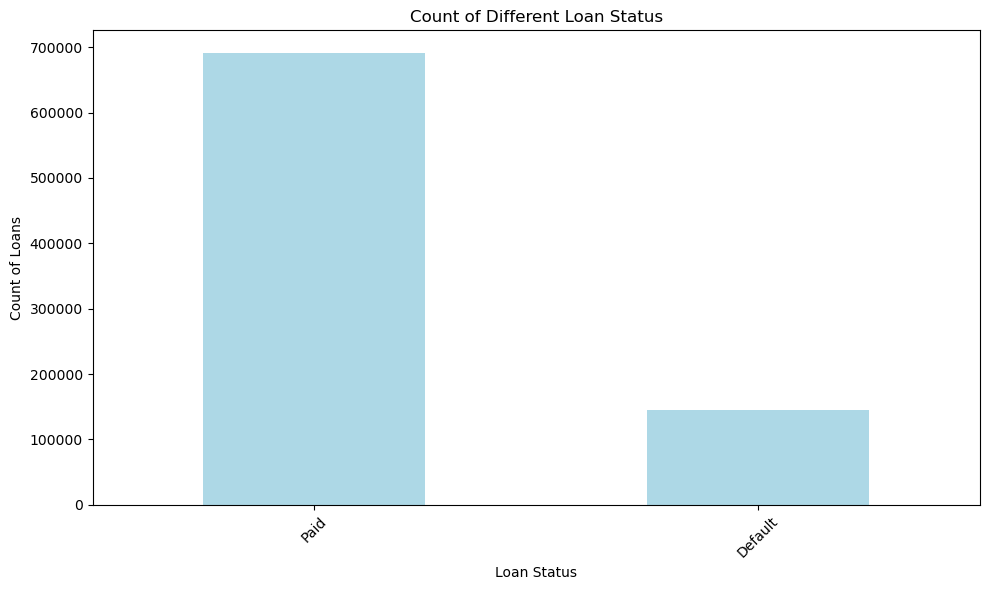

In [12]:
# Create a bar plot for the count of each unique value in 'MIS_Status' column
plt.figure(figsize=(10, 6))
df['MIS_Status'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Loan Status')
plt.ylabel('Count of Loans')
plt.title('Count of Different Loan Status')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

The bar plot visually represents the distribution of loan statuses, showing the count of loans in each category. This plot provides an overview of the loan status distribution in the dataset.

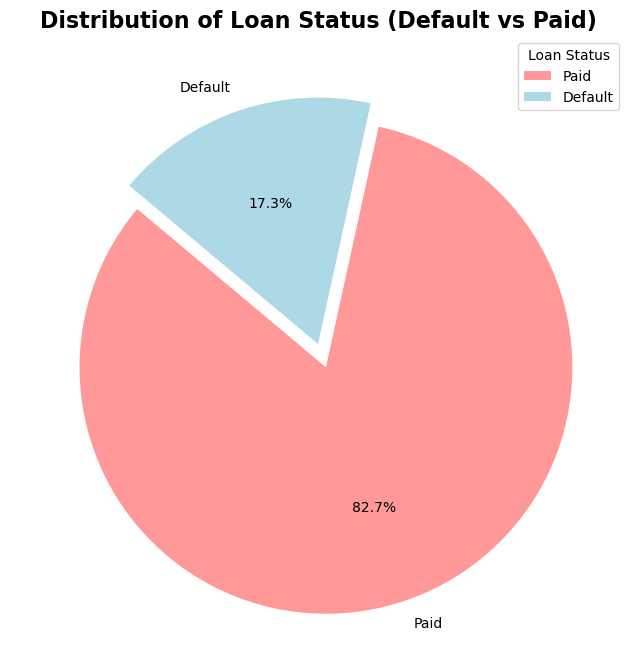

In [13]:
# Group the data by "MIS_Status" and count the occurrences
status_counts = df['MIS_Status'].value_counts()

# Define colors for the pie chart
colors = ['#ff9999', 'lightblue']

# Specify the 'Default' slice to explode
explode = (0.1, 0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Add a legend
plt.legend(status_counts.index, title="Loan Status", loc="upper right")

# Set a title
plt.title("Distribution of Loan Status (Default vs Paid)", fontsize=16, fontweight="bold")

# Display the chart
plt.show()

Of the loans in the dataset, 82.7% are successfully paid, while 17.3% are classified as defaults.

<Figure size 1200x600 with 0 Axes>

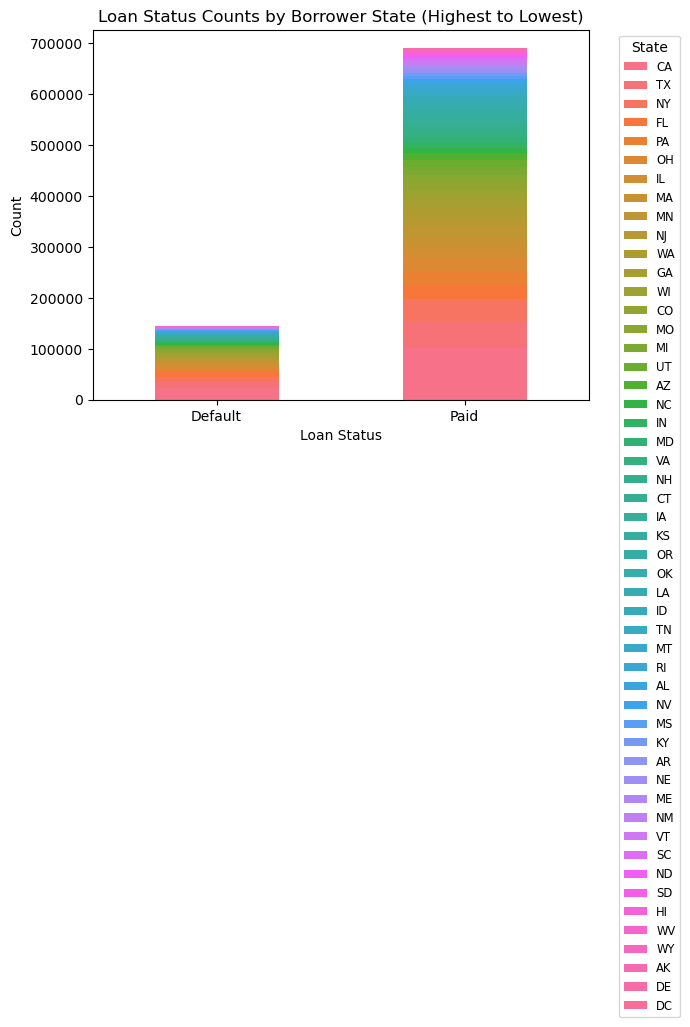

In [14]:
# Create a pivot table to count 'Paid' and 'Default' statuses by borrower state
pivot_table = df.pivot_table(index='State', columns='MIS_Status', aggfunc='size', fill_value=0)

# Sort the pivot table by the sum of 'Default' counts in descending order
pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]

# Create a custom color palette with a unique color for each borrower state
unique_colors = sns.color_palette("husl", n_colors=len(pivot_table.index))

# Create a bar chart to visualize loan status counts by borrower state
plt.figure(figsize=(12, 6))
bar_chart = pivot_table.T.plot(kind='bar', stacked=True, color=unique_colors)
plt.title('Loan Status Counts by Borrower State (Highest to Lowest)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels

# Customize the legend
legend_labels = pivot_table.index
plt.legend(legend_labels, title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()

This visual representation illustrates the loan status distributed across various states for each loan. It offers valuable insights into the geographic distribution of loan outcomes, allowing us to identify trends and patterns that may be influenced by regional factors.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836136 entries, 0 to 836135
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           836136 non-null  object 
 1   City           836136 non-null  object 
 2   State          836136 non-null  object 
 3   Zip            836136 non-null  int64  
 4   Bank           836136 non-null  object 
 5   BankState      836136 non-null  object 
 6   NAICS          836136 non-null  int64  
 7   NoEmp          836136 non-null  int64  
 8   NewExist       836136 non-null  float64
 9   FranchiseCode  836136 non-null  int64  
 10  UrbanRural     836136 non-null  int64  
 11  RevLineCr      836136 non-null  object 
 12  MIS_Status     836136 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 82.9+ MB


In [16]:
# Make a new dataframe of only the categorical variables
categorical_df = df.select_dtypes('object').copy()

# Check
categorical_df.head()

,Name,City,State,Bank,BankState,RevLineCr,MIS_Status
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,N,Paid
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,N,Paid
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,N,Paid
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,N,Paid
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,N,Paid


### Univariate Analysis - Numeric variables

Let's repeat the process we did above with the numeric variables:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836136 entries, 0 to 836135
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           836136 non-null  object 
 1   City           836136 non-null  object 
 2   State          836136 non-null  object 
 3   Zip            836136 non-null  int64  
 4   Bank           836136 non-null  object 
 5   BankState      836136 non-null  object 
 6   NAICS          836136 non-null  int64  
 7   NoEmp          836136 non-null  int64  
 8   NewExist       836136 non-null  float64
 9   FranchiseCode  836136 non-null  int64  
 10  UrbanRural     836136 non-null  int64  
 11  RevLineCr      836136 non-null  object 
 12  MIS_Status     836136 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 82.9+ MB


In [18]:
# Get only the numeric columns
numeric_df = df.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,Zip,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural
0,47711,451120,4,2.0,1,0
1,46526,722410,2,2.0,1,0
2,47401,621210,7,1.0,1,0
3,74012,0,2,1.0,1,0
4,32801,0,14,1.0,1,0


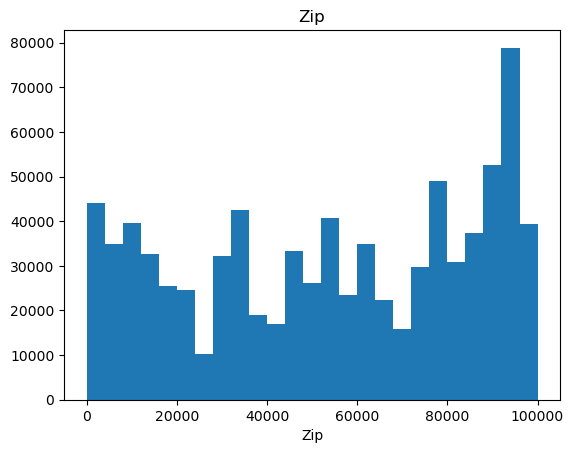

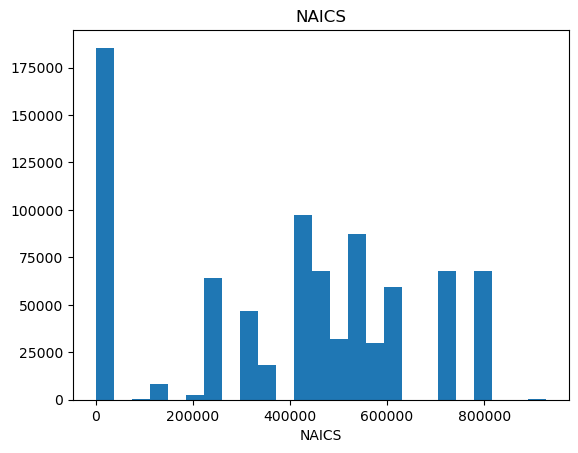

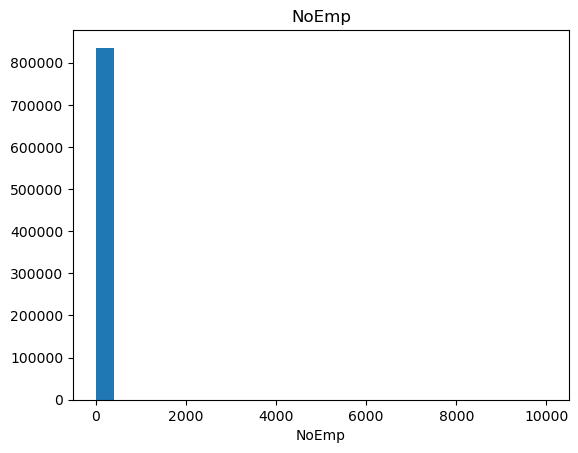

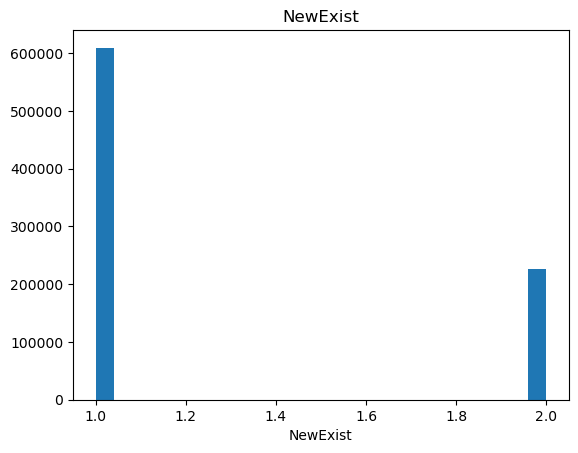

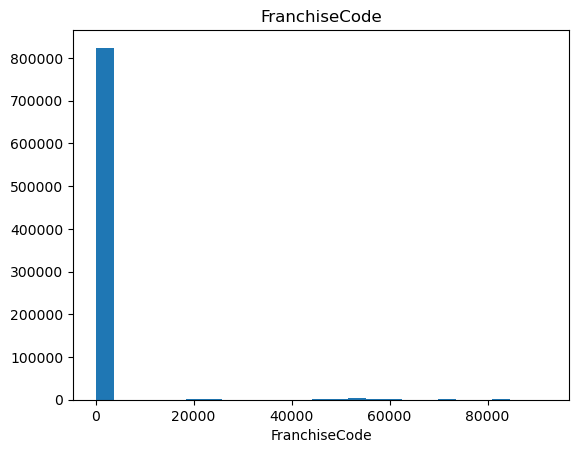

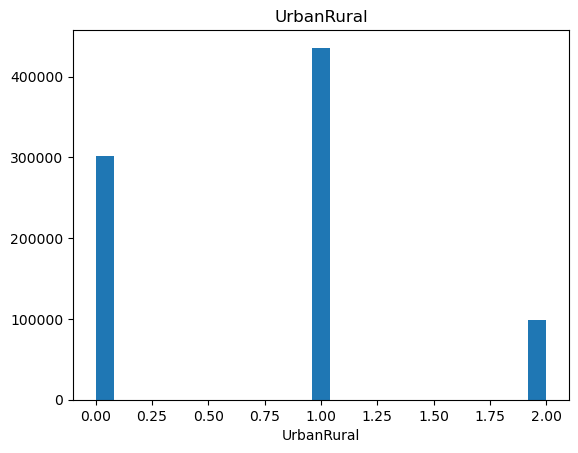

In [19]:
for column in numeric_df:
    plt.figure()
    plt.hist(df[column], bins=25)
    plt.title(column)
    plt.xlabel(column)
    plt.show()

The above generates histograms for each numeric column in the dataset. 

- It iterates through each column in the `numeric_df`.
- For each column, it creates a histogram with 25 bins to visualize the data distribution.
- The title of each histogram corresponds to the column name.
- The x-axis label is also set to the column name.

This visualization helps us understand the distribution of numeric data in the dataset.

### Bivariate Analysis - Numeric Features
Now we will repeat the process for numeric variables.

In [20]:
numeric_df

,Zip,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural
0,47711,451120,4,2.0,1,0
1,46526,722410,2,2.0,1,0
2,47401,621210,7,1.0,1,0
3,74012,0,2,1.0,1,0
4,32801,0,14,1.0,1,0
...,...,...,...,...,...,...
836131,43221,451120,6,1.0,1,0
836132,43221,451130,6,1.0,1,0
836133,93455,332321,26,1.0,1,0
836134,96830,0,6,1.0,1,0


In [21]:
# We need the "MIS_Status" variable so we will add it back to our numeric dataframe
numeric_df['MIS_Status'] = df['MIS_Status']

# Check
numeric_df.head()

,Zip,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,MIS_Status
0,47711,451120,4,2.0,1,0,Paid
1,46526,722410,2,2.0,1,0,Paid
2,47401,621210,7,1.0,1,0,Paid
3,74012,0,2,1.0,1,0,Paid
4,32801,0,14,1.0,1,0,Paid


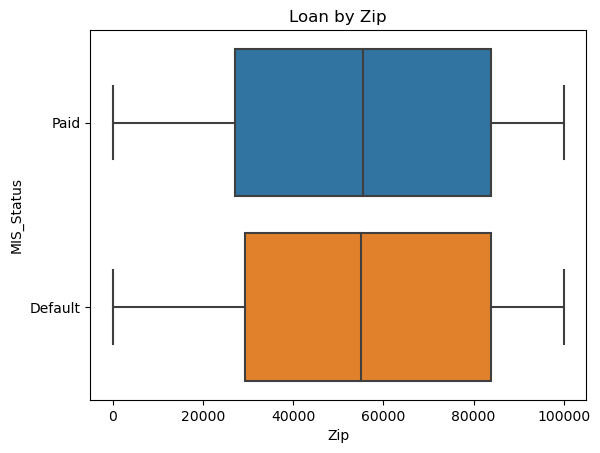

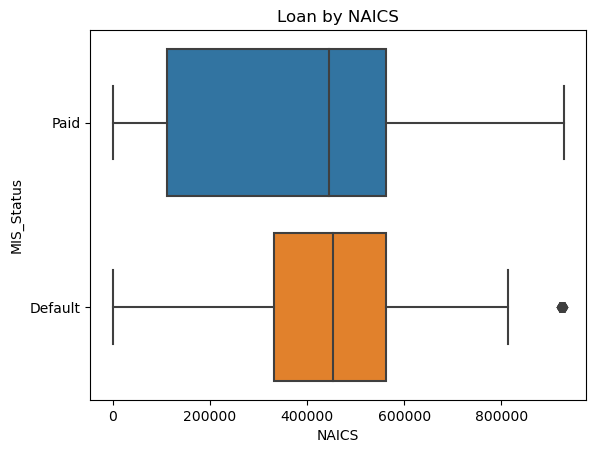

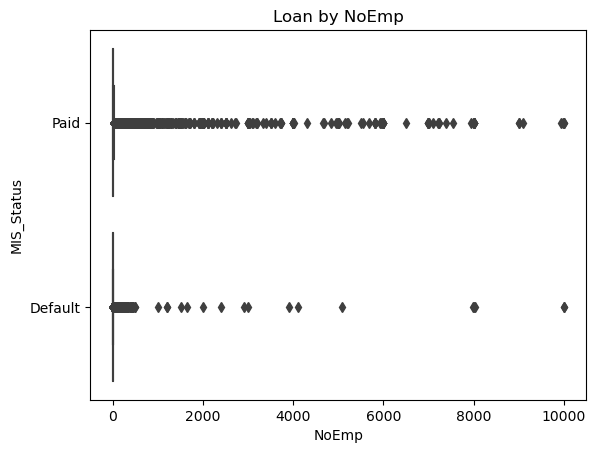

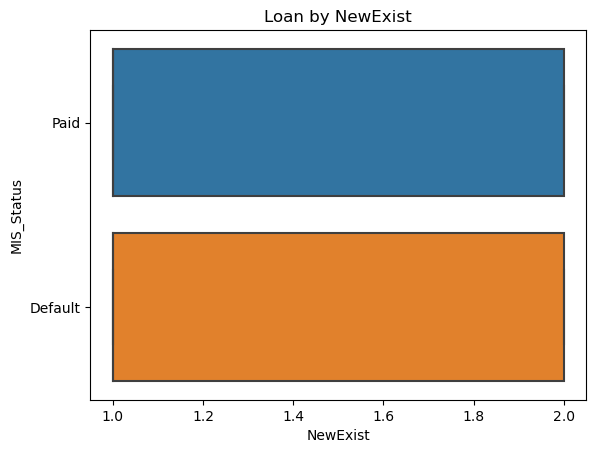

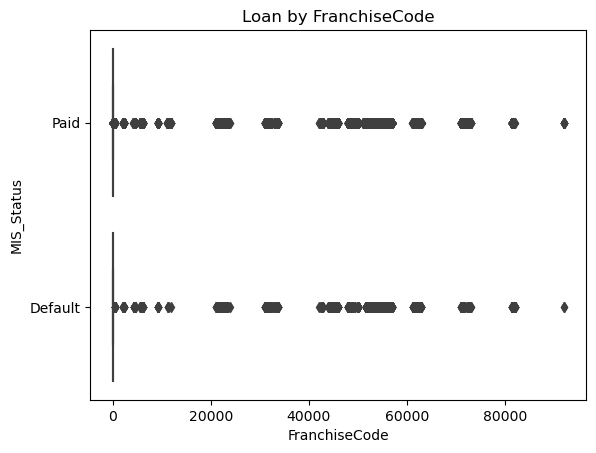

In [22]:
# Converting the MIS_Status column to string type so seaborn treats it as a category
for col in numeric_df.iloc[:, :-2]:

    # Normalize the histogram
    sns.boxplot(x=col, y='MIS_Status', data=df)
    plt.title(f'Loan by {col}')
    plt.show()

The boxplots provide key insights into how the distribution of numeric features varies in the context of loan outcomes. They illustrate how the 'MIS_Status' (categorized as 'Paid' or 'Default') relates to each numeric feature. These visualizations are valuable for understanding how numeric features may influence loan outcomes. Differences in feature distributions between 'Paid' and 'Default' loans can provide insights into factors that affect the likelihood of loan default. 

In [23]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                    Zip     NAICS     NoEmp  NewExist  FranchiseCode  \
Zip            1.000000 -0.033423  0.013762 -0.042745       0.006845   
NAICS         -0.033423  1.000000 -0.039889  0.046889       0.006468   
NoEmp          0.013762 -0.039889  1.000000 -0.042064       0.001256   
NewExist      -0.042745  0.046889 -0.042064  1.000000       0.073070   
FranchiseCode  0.006845  0.006468  0.001256  0.073070       1.000000   
UrbanRural    -0.072160  0.426564 -0.043320  0.034914      -0.010318   

               UrbanRural  
Zip             -0.072160  
NAICS            0.426564  
NoEmp           -0.043320  
NewExist         0.034914  
FranchiseCode   -0.010318  
UrbanRural       1.000000  


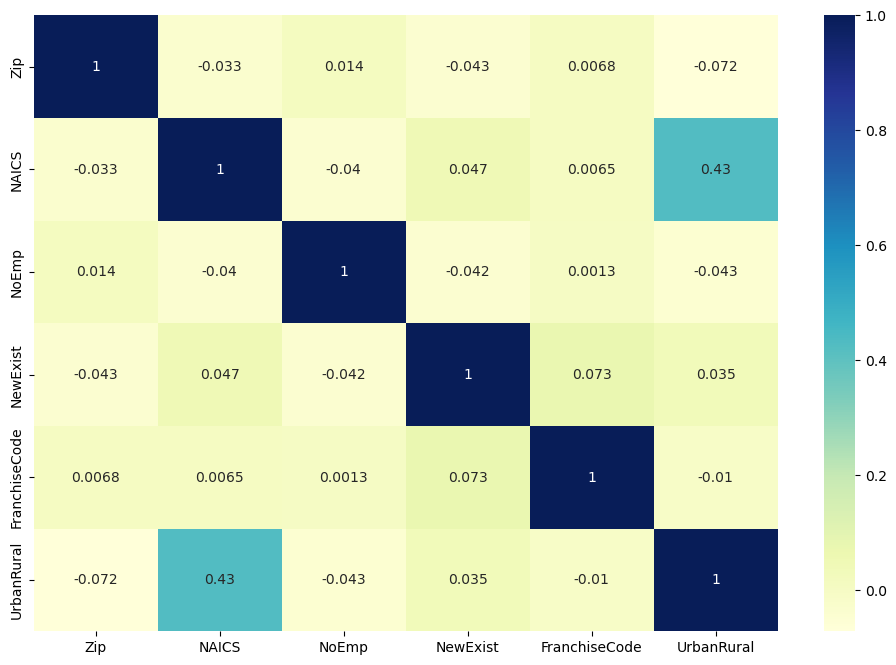

In [24]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')

# Show the plot
plt.show()

**Correlation Comment:**

In the correlation matrix, we observe a moderate positive correlation of approximately 0.4 between two variables. This suggests that there is a noticeable, but not very strong, linear relationship between these variables. A correlation of 0.4 indicates that as one variable increases, the other tends to increase as well, but the relationship is not exceptionally strong. This finding is valuable for understanding the data but may not be indicative of a highly influential connection between these particular attributes.


<Axes: xlabel='NAICS', ylabel='UrbanRural'>

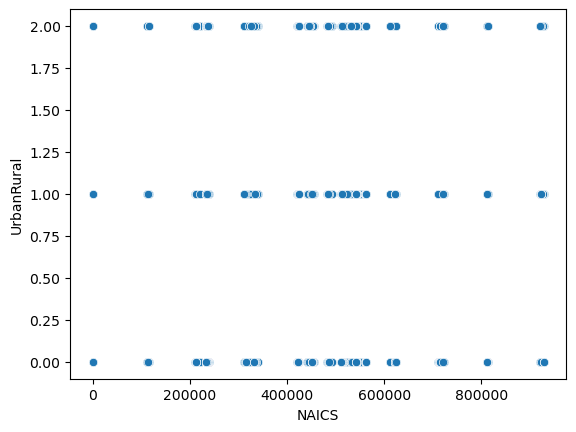

In [25]:
# Plottting a scatterplot between 'installment' and 'loan_amnt' columns
sns.scatterplot(x='NAICS', y='UrbanRural', data=df)

**Correlation Comment:**

It's important to note that the observed correlation between 'NAICS' and 'UrbanRural' is primarily a result of the identical values in these columns. Both 'NAICS' and 'UrbanRural' contain the same numerical values. This correlation is not indicative of a meaningful relationship. Therefore, any correlation found in this context is not interpretable as a genuine statistical relationship between the variables.

### Hypotheses for Further Analysis

Plan on building a logistic regression model because it's well-suited for predicting binary outcomes, such as loan default. Logistic regression provides probabilities and insights into the impact of variables.

### Columns for Consideration in Predicting Loan Approval

In the context of building a logistic regression model to predict loan approval (MIS_Status), it's crucial to consider which columns from the given dataset can serve as valuable predictors. Below is an analysis of each column and its potential relevance:

1. **Name**: The business name (Name) might not be a direct predictor of loan approval due to its unstructured text nature.

2. **City**: The city where the business is located (City) could be relevant for predicting loan approval, as urban and rural areas may have different economic conditions.

3. **State**: The state (State) can also be significant, considering that economic conditions and lending practices can vary widely across states.

4. **Zip**: The ZIP code (Zip) provides detailed geographical information, but it should be used cautiously to avoid overfitting.

5. **Bank**: The bank (Bank) could influence loan approval as different banks may have varying lending policies.

6. **BankState**: The state where the bank is located (BankState) is essential, as lending regulations and policies may differ by state.

7. **NAICS**: The NAICS code (NAICS) represents the business's industry or sector and can be a valuable categorical predictor.

8. **NoEmp**: The number of employees (NoEmp) in the business is relevant as smaller businesses might have different loan approval rates compared to larger ones.

9. **NewExist**: The NewExist column represents whether the business is new (1) or existing (2), which can impact loan approval.

10. **FranchiseCode**: The FranchiseCode is categorical, indicating whether the business is a franchise (1) or not (0), which can influence loan approval.

11. **UrbanRural**: The UrbanRural column specifies whether the business is in an urban (1) or rural (0) area, serving as a binary categorical predictor.

12. **RevLineCr**: The Revolving Line of Credit (RevLineCr) column is binary (Yes/No) and signifies whether the business has a revolving line of credit, making it highly relevant for predicting loan approval.

## Findings Summary  <a class="anchor" id="findings"></a>

From our initial analysis let's summarize what we have found out so far about the differences between clients who paid in full versus those who do not.

The exploratory data analysis of loan outcomes reveals that a significant majority of loans, approximately 82.7%, are successfully paid off. Conversely, approximately 17.3% of the loans are classified as defaults, reflecting the proportion of loans that did not meet their repayment obligations. These findings highlight the importance of understanding and monitoring loan default rates to make informed lending decisions and risk assessments.

We have found out that the top most loans defaulting are from the following borrowers states:
1. California
2. Texas
3. New York
4. Florida

## Saving the Data  <a class="anchor" id="saving"></a>

Now that we have spent the time exploring this dataset, we are going to save it for future use. We will be using our cleaned dataset to carry out some modeling work to learn more about the dataset!

In [28]:
# Save the data to a csv file for future use

df.to_csv('Explored_Loan_Data.csv', index=False)